In [1]:
# 0. 기본 세팅
# 필요 라이브러리 import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 0. 기본 세팅
# 폰트 및 한글 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 0. 기본 세팅
# 분석할 csv 파일 불러오기
file_path = "/Users/eon/skRookies/myPython/Python_WebScraping_Analysis/data/인구현황.csv"
df = pd.read_csv(file_path, encoding='utf-8')

In [4]:
# 0. 기본 세팅
# 필터링 - 결괏값에 "전국" 미포함
df = df[df['행정기관'] != '전국']

In [5]:
# 5. 세대당 인구 평균보다 높은 지역
# 전국 평균 계산
average_per_house = df['세대당 인구'].mean()
print(f"전국 평균 세대당 인구수: {average_per_house:.2f}")

전국 평균 세대당 인구수: 2.11


In [6]:
# 5. 세대당 인구 평균보다 높은 지역
# 평균 초과 지역 테이블 추출
over_average = (
    df[df['세대당 인구'] > average_per_house][['행정기관', '세대당 인구']]
    .sort_values('세대당 인구', ascending=False)
    .reset_index(drop=True)
)

In [7]:
# 5. 세대당 인구 평균보다 높은 지역
# 결과 출력
print(over_average)

      행정기관  세대당 인구
0  세종특별자치시    2.39
1      경기도    2.26
2    울산광역시    2.22
3    인천광역시    2.20
4    대구광역시    2.14
5    광주광역시    2.14
6  제주특별자치도    2.13


/var/folders/p_/_c9chpr14vxg3hvpscn52m740000gn/T/ipykernel_98236/3984499313.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.sort_values('세대수', ascending=False),


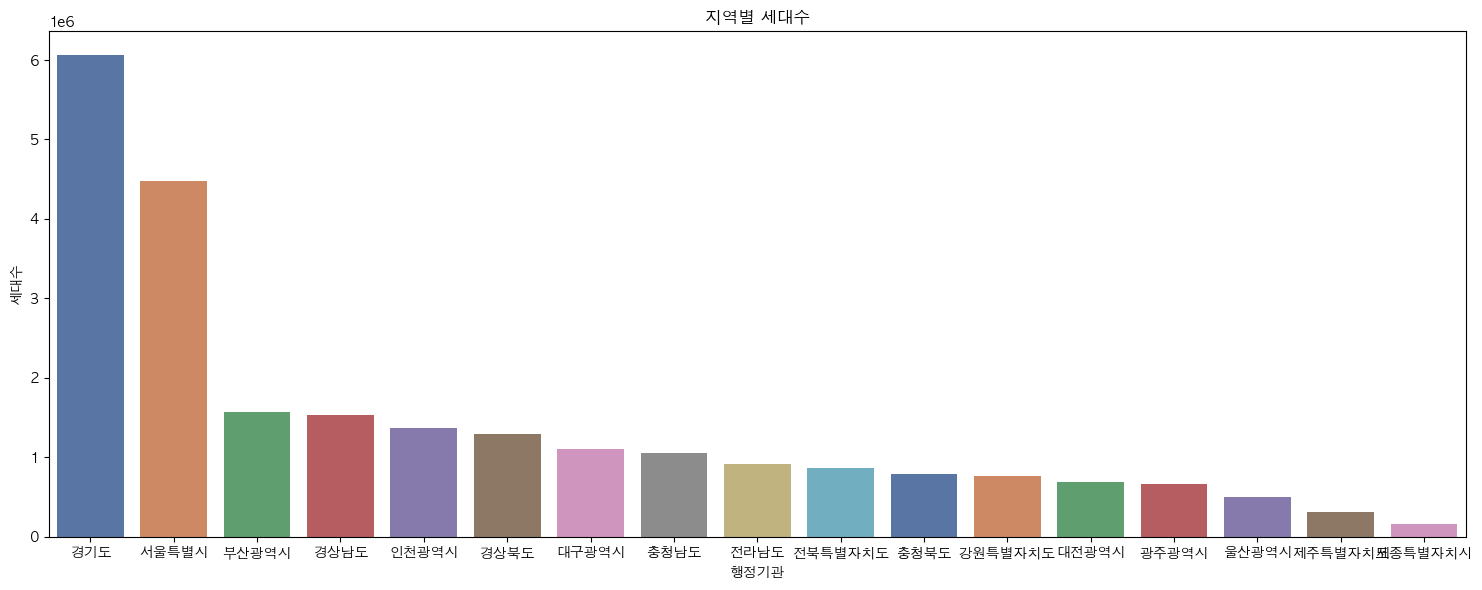

In [8]:
# 5-1. 남초 vs 여초 개수 Plot(seaborn의 countplot), 지역별 세대수 Plot(seaborn의 barplot)
# 지역별 세대수 Plot(seaborn의 barplot)
plt.figure(figsize=(15,6))
sns.barplot(data=df.sort_values('세대수', ascending=False),
            x='행정기관',
            y='세대수',
            palette='deep'
            )
plt.title('지역별 세대수')
plt.tight_layout()
plt.show()